# Amazon Bedrock 

### 建立 `bedrock` 客戶端

In [8]:
import json
# 這個 SDK 使用 boto3
import boto3
import base64
from dotenv import load_dotenv
import os

# 環境變數
load_dotenv()

AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")
AWS_REGION = os.getenv("AWS_REGION")

# Bedrock 客戶端
bedrock = boto3.client(
    service_name="bedrock",
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
    region_name=AWS_REGION
)

# 模型推理客戶端
bedrock_runtime = boto3.client(
    service_name="bedrock-runtime",
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
    region_name=AWS_REGION
)

### 列出可用模型

In [3]:
# 查詢全部的基礎模型
all_llms = [ 
    model['modelId']
    for model in bedrock.list_foundation_models()['modelSummaries']
]
all_llms

['amazon.titan-tg1-large',
 'amazon.titan-image-generator-v1:0',
 'amazon.titan-image-generator-v1',
 'amazon.titan-text-premier-v1:0',
 'amazon.titan-embed-g1-text-02',
 'amazon.titan-text-lite-v1:0:4k',
 'amazon.titan-text-lite-v1',
 'amazon.titan-text-express-v1:0:8k',
 'amazon.titan-text-express-v1',
 'amazon.titan-embed-text-v1:2:8k',
 'amazon.titan-embed-text-v1',
 'amazon.titan-embed-text-v2:0:8k',
 'amazon.titan-embed-text-v2:0',
 'amazon.titan-embed-image-v1:0',
 'amazon.titan-embed-image-v1',
 'stability.stable-diffusion-xl-v1:0',
 'stability.stable-diffusion-xl-v1',
 'ai21.j2-grande-instruct',
 'ai21.j2-jumbo-instruct',
 'ai21.j2-mid',
 'ai21.j2-mid-v1',
 'ai21.j2-ultra',
 'ai21.j2-ultra-v1:0:8k',
 'ai21.j2-ultra-v1',
 'anthropic.claude-instant-v1:2:100k',
 'anthropic.claude-instant-v1',
 'anthropic.claude-v2:0:18k',
 'anthropic.claude-v2:0:100k',
 'anthropic.claude-v2:1:18k',
 'anthropic.claude-v2:1:200k',
 'anthropic.claude-v2:1',
 'anthropic.claude-v2',
 'anthropic.claude

### 使用 `Anthropic (Claude v2)`

In [4]:
prompt_data = """
你能創作一首關於一位資料科學家同時也是一位非常優秀的歌手的詩嗎？
"""

body = {
    "anthropic_version": "bedrock-2023-05-31",
    "max_tokens": 1024,
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": prompt_data
                }
            ]
        }
    ],
}

# 將正文編碼為 JSON 字串
body = json.dumps(body)
model_id = "anthropic.claude-v2"
accept = 'application/json'
contentType = 'application/json'

#### Invoke model 


In [5]:
response = bedrock_runtime.invoke_model(
    body=body,
    modelId=model_id,
    accept=accept,
    contentType=contentType
)

#### 輸出 response

In [ ]:
response_body = json.loads(
    response.get("body").read()
)
for output in response_body.get("content", []):
    print(output["text"])

### 語法多模態模型 `Anthropic Claude v3 Models`

In [ ]:
with open("棒球場.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
    base64_string = encoded_string.decode('utf-8')
#
payload = {
    "modelId": "anthropic.claude-3-sonnet-20240229-v1:0",
    "contentType": "application/json",
    "accept": "application/json",
    "body": {
        "anthropic_version": "bedrock-2023-05-31",
        "max_tokens": 1000,
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "image",
                        "source": {
                            "type": "base64",
                            "media_type": "image/png",
                            "data": base64_string
                        }
                    },
                    {
                        "type": "text",
                        "text": "Write me a detailed description of this photo."
                    }
                ]
            }
        ]
    }
}

# 轉換 payload to bytes
body_bytes = json.dumps(payload['body']).encode('utf-8')
# Invoke the model
model_id = "anthropic.claude-3-sonnet-20240229-v1:0"
accept = 'application/json'
contentType = 'application/json'

response = bedrock_runtime.invoke_model(
    body=body_bytes,
    modelId=model_id,
    accept=accept,
    contentType=contentType
)


In [ ]:
response_body = json.loads(response.get("body").read())
print(
    response_body.get('content')[0].get('text')
)
'''
此圖描繪了夜間比賽期間的職業棒球場。體育場看台上擠滿了觀眾，球場上燈光明亮。
比賽場地本身是原始的綠色，具有獨特的菱形形狀和內場標記。可以看到球員們站在場上，專注於比賽。
外場牆上設有大型電子記分板和廣告顯示屏，展示可口可樂等企業贊助商。
體育場獨特的建築元素，如高聳的輕型支柱也清晰可見。
總體而言，該圖像捕捉到了美國職棒大聯盟比賽的充滿活力的氛圍、人群的活力、球場的戲劇性
以及現代體育場的標誌性特徵。
'''

可查看圖片

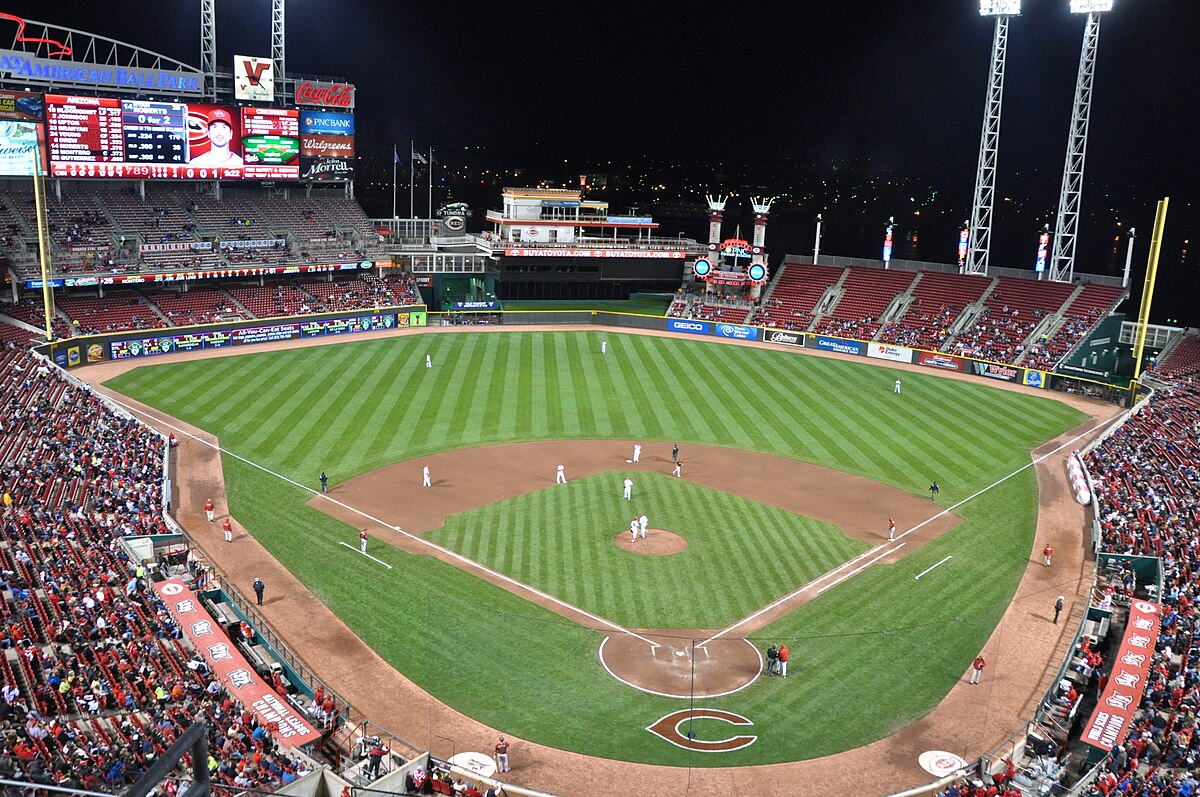

In [12]:
from IPython.display import Image

img_path = "棒球場.jpg"
Image(filename=img_path, width=1000, height=1000)

使用模型 `Mistral (mixtral-8x7b)`

In [9]:
prompt_data = """
編寫一個 Python 函數將攝氏度轉換為華氏度。
如果水在 100°C 沸騰，那麼華氏度是多少？
"""

body = json.dumps({ 
    'prompt': prompt_data,
    'max_tokens': 200,
    'top_p': 0.9,
    'temperature': 0.2,
})
modelId = 'mistral.mixtral-8x7b-instruct-v0:1'
accept = 'application/json'
contentType = 'application/json'

#### Invoke model 


In [10]:
response = bedrock_runtime.invoke_model(
    # Encode to bytes
    body=body.encode('utf-8'),
    modelId=modelId, 
    accept=accept, 
    contentType=contentType
)

#### Print response

In [11]:
response_body = json.loads(
    response.get('body').read().decode('utf-8')
)
print(response_body.get('outputs')[0].get('text'))



def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

print(celsius_to_fahrenheit(100))






















































































































































### 4) With `Amazon Titan`

In [ ]:
prompt_data = """Write me a poem about table and chair"""

text_gen_config = {
                    "maxTokenCount": 512,
                    "stopSequences": [], 
                    "temperature": 0,
                    "topP": 0.9
                }

body = json.dumps({
                        "inputText": prompt_data,
                        "textGenerationConfig": text_gen_config  
                    })

model_id = 'amazon.titan-tg1-large'
accept = 'application/json' 
content_type = 'application/json'

#### Invoke model 


In [ ]:
response = bedrock_runtime.invoke_model(
                                            body=body, 
                                            modelId=model_id, 
                                            accept=accept, 
                                            contentType=content_type
                                        )

#### Print response

In [ ]:
response_body = json.loads(response['body'].read())
print(response_body['results'][0]['outputText'])